# Lab2: 
# Logistic Regression and Support Vector Machine
### name：陈涵
### student number：201936380086

## Motivation of Experiment
1. Compare andand understand the difference between gradient descent and batch random stochastic gradient descent.
2. Compare and understand the differences and relationships between Logistic regression and linear classification.
3. Further understand the principles of SVM and practice on larger data.

## Dataset
Experiment uses a9a of LIBSVM Data, including 32561/16281(testing) samples and each sample has 123/123 (testing) features. Please download the training set and validation set. The dimension may be wrong, which is due to the values of last column are all zero so it is ignored. This can be fixed by adding one column by yourself or specify the n_features to be 123 when using the function.

## Experiment Step


### A. Logistic Regression and Batch Stochastic Gradient Descent

1. Load the training set and validation set.

In [1]:
from sklearn.datasets import load_svmlight_file
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
import math

data = load_svmlight_file("a9a.txt", n_features=123)
X_train = data[0].toarray()
Y_train = data[1].reshape((data[1].shape[0],1))
data1 = load_svmlight_file("a9a.t", n_features=123)
X_test = data1[0].toarray()
Y_test = data1[1].reshape((data1[1].shape[0], 1))

2. Initialize logistic regression model parameter (you can consider initializing zeros, random numbers or normal distribution).
3. Select the loss function and calculate its derivation. $$ \min \mathcal{Loss}(W) = \frac{1}{n} \sum_{i=1}^n log(1+e^{-y_i W^T X_i})$$
To avoid overfitting, we rewrite this equation by regular item $\frac{\lambda}{2} \parallel W \parallel^2$:
$$ \min \mathcal{J}(W) = \frac{1}{n} \sum_{i=1}^n log(1+e^{-y_i W^T X_i}) + \frac{\lambda}{2} \parallel W \parallel^2$$

In [2]:
def calc_loss_A(X, Y, W):
    loss = 0
    for i in range(X.shape[0]):
        Xi = X[i]
        Yi = Y[i]
        exp_ywx = math.exp(-Yi*W.T.dot(Xi))
        loss = loss + math.log(1+exp_ywx)
    loss = (1/X.shape[0])*loss
    return loss

4. Determine the size of the batch_size and randomly take some samples,calculate gradient G toward loss function from partial samples.
5. Use the SGD optimization method to update the parametric model and encourage additional attempts to optimize the Adam method.

We have sigmoid function:
$$\mathcal{g}(Z) = \frac{1}{1+e^{-Z}}$$

In [3]:
def sigmoid(Z):
    return 1/(1+math.exp(-Z))

6. Select the appropriate threshold, mark the sample whose predict scores greater than the threshold as positive, on the contrary as negative. Predict under validation set and get the loss $Lvalidation$.

We define the threshold at 0.5, if $\mathcal{g}(W^T X_i) \gt 0.5$ , it's positive, or t's negative.

In [4]:
def calc_validation_A(W):
    match_count = 0
    for i in range(X_test.shape[0]):
        Z = W.T.dot(X_test[i])
        f = sigmoid(Z)
        if f > 0.5:
            flag = 1
        else:
            flag = -1
        if flag == Y_test[i][0]:
            match_count = match_count + 1
    return match_count/X_test.shape[0]

Calculating gradient with formula below:
$$  \frac{\partial \mathcal{J}(W)}{\partial W} = -\frac{1}{n} \sum_{i=1}^n \frac{y_i X_i e^{-y_i W^T X_i}}{1+e^{-y_i W^T X_i}} + \lambda W$$

In [5]:
def calc_gradient_A(X, Y, W, lamda):
    grad = 0
    for i in range(X.shape[0]):
        Xi = X[i]
        Yi = Y[i]
        exp_ywx = math.exp(-Yi*W.T.dot(Xi))
        temp = (Yi*Xi*exp_ywx)/(1+exp_ywx)
        grad = grad + temp
    grad = -(1/X.shape[0])*grad
    grad = grad.reshape(grad.shape[0], 1)
    grad = grad + (lamda*W)
    return grad

7. Repeat step 4 to 6 for several times, and drawing graph of $Lvalidation$ with the number of iterations.

In [6]:
def Logistic_Regression(X, Y, learning_rate, lamda, epoch, batch):
    loss = []
    acc = []
    W = np.random.rand(X.shape[1], 1)
    for i in tqdm(range(epoch), desc="Training pass: ", leave=True):
        bat = np.random.choice(X.shape[0], batch)
        X_batch = X[bat]
        Y_batch = Y[bat]
        gradient = calc_gradient_A(X_batch, Y_batch, W, lamda)
        W = W - learning_rate*gradient
        loss.append(calc_loss_A(X, Y, W))
        acc.append(calc_validation_A(W))
    return W, loss, acc

Training pass: 100%|██████████| 200/200 [00:17<00:00, 11.54it/s]


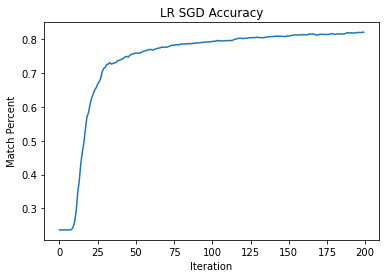

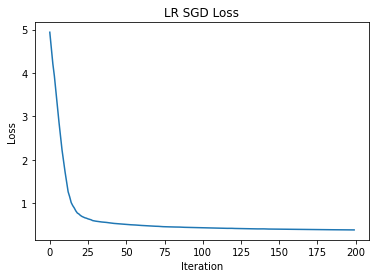

In [7]:
W, loss, acc = Logistic_Regression(X_train, Y_train, 0.1, 0.01, 200, 30)

plt.figure()
plt.plot(acc)
plt.title("LR SGD Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Match Percent")
plt.savefig('lab2_lr_sgd_acc.pdf')
plt.show()
plt.figure()
plt.plot(loss)
plt.title("LR SGD Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig('lab2_lr_sgd_loss.pdf')
plt.show()

Optimizing with Adam method.

In [8]:
def Logistic_Regression_Adam(X, Y, learning_rate, lamda, epoch, batch, eps=1e-8, beta1=0.9, beta2=0.999):
    loss = []
    acc = []
    m = 0
    v = 0
    W = np.random.rand(X.shape[1], 1)
    for i in tqdm(range(epoch), desc="Training pass: ", leave=True):
        bat = np.random.choice(X.shape[0], batch)
        X_batch = X[bat]
        Y_batch = Y[bat]
        gradient = calc_gradient_A(X_batch, Y_batch, W, lamda)
        m = beta1 * m + (1 - beta1) * gradient
        v = beta2 * v + (1 - beta2) * (gradient ** 2)
        W = W - learning_rate * m / (np.sqrt(v) + eps)
        loss.append(calc_loss_A(X, Y, W))
        acc.append(calc_validation_A(W))
    return W, loss, acc

Training pass: 100%|██████████| 200/200 [00:17<00:00, 11.42it/s]


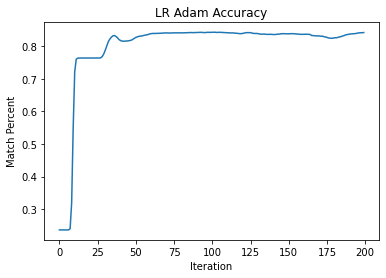

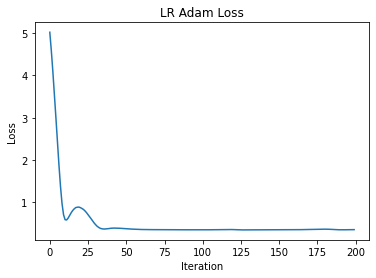

In [9]:
W, loss, acc = Logistic_Regression_Adam(X_train, Y_train, 0.01, 0.01, 200, 30)
plt.figure()
plt.plot(acc)
plt.title("LR Adam Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Match Percent")
plt.savefig('lab2_lr_adam_acc.pdf')
plt.show()
plt.figure()
plt.plot(loss)
plt.title("LR Adam Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig('lab2_lr_adam_loss.pdf')
plt.show()

### B. Linear Classification and Batch Stochastic Gradient Descent

1. Load the training set and validation set.

In [10]:
data = load_svmlight_file("a9a.txt", n_features=123)
X_train = data[0].toarray()
Y_train = data[1].reshape((data[1].shape[0],1))
data1 = load_svmlight_file("a9a.t", n_features=123)
X_test = data1[0].toarray()
Y_test = data1[1].reshape((data1[1].shape[0], 1))

2. Initialize SVM model parameters.
3. Select the loss function and calculate its derivation.

SVM loss:
$$ \min_{W, b} \mathcal{L}(W, b)= \frac{\parallel W \parallel^2}{2} + \frac{C}{n} \sum_{i=1}^n max(0, 1-y_i(W^T X_i + b))$$

In [11]:
def calc_loss_B(X, Y, W, b, c):
    loss = 0
    for i in range(X.shape[0]):
        Xi = X[i]
        Yi = Y[i]
        loss = loss + max(0, 1 - Yi*(W.T.dot(Xi) + b))
    loss = (c/X.shape[0])*loss
    loss = loss + 0.5*(np.linalg.norm(W)**2)
    return loss

4. Determine the size of the batch_size and randomly take some samples,calculate gradient G toward loss function from partial samples.
5. Use the SGD optimization method to update the parametric model and encourage additional attempts to optimize the Adam method.
6. Select the appropriate threshold, mark the sample whose predict scores greater than the threshold as positive, on the contrary as negative. Predict under validation set and get the loss $Lvalidation$.

We define threshold value at 0, if $\mathcal{f}(W^T X_i+b) \gt 0$, it's positive, or it's negative 

In [12]:
def calc_validation_B(W, b):
    match_count = 0
    for i in range(X_test.shape[0]):
        Xi = X_test[i]
        f = W.T.dot(Xi) + b
        if f > 0:
            flag = 1
        else:
            flag = -1
        if flag == Y_test[i][0]:
            match_count = match_count + 1
    return match_count/X_test.shape[0]

formula of gradient:
$$ \frac{\partial \mathcal{L}(W, b)}{\partial W} = \begin{cases}
-y_i X_i, & 1-y_i(W^T X_i + b) \ge 0 \\
0, &1-y_i(W^T X_i + b) < 0
\end{cases}$$


$$ \frac{\partial \mathcal{L}(W, b)}{\partial b} = \begin{cases}
-y_i, & 1-y_i(W^T X_i + b) \ge 0 \\
0, &1-y_i(W^T X_i + b) < 0
\end{cases}$$

In [13]:
def calc_gradient_B(X, Y, W, b, c):
    grad_W = np.zeros((W.shape[0], ))
    grad_b = 0
    for i in range(X.shape[0]):
        Xi = X[i]
        Yi = Y[i]
        if Yi*(W.T.dot(Xi) + b) <= 1:
            grad_W = grad_W + (-Yi*Xi)
            grad_b = grad_b + (-Yi)
    grad_W = np.reshape(grad_W.shape[0], 1)
    grad_W = W + (c/X.shape[0]) * grad_W
    grad_b = (c/X.shape[0]) * grad_b
    return grad_W, grad_b

We define the SVM_classifier with Stochastic Gradient Descent.

In [14]:
def SVM_classifier(X, Y, c, epoch, batch, learning_rate):
    loss = []
    acc = []
    W = np.random.rand(X.shape[1], 1)
    b = 0
    for i in tqdm(range(epoch), desc="Training pass: ", leave=True):
        bat = np.random.choice(X.shape[0], batch)
        X_batch = X[bat]
        Y_batch = Y[bat]
        gradient_W, gradient_b = calc_gradient_B(X_batch, Y_batch, W, b, c)
        W = W - learning_rate * gradient_W
        b = b - learning_rate * gradient_b
        loss.append(calc_loss_B(X, Y, W, b, c))
        acc.append(calc_validation_B(W, b))
    return W, loss, acc

Training pass: 100%|██████████| 100/100 [00:15<00:00,  6.44it/s]


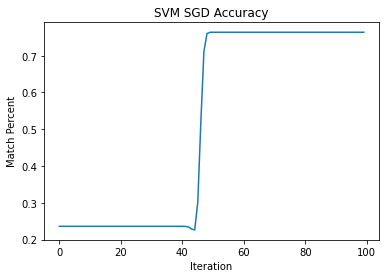

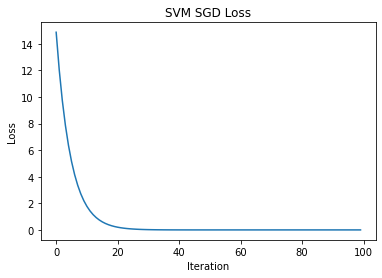

In [15]:
W, loss, acc = SVM_classifier(X=X_train, Y=Y_train, c=0.001, epoch=100, batch=40, learning_rate=0.1)

plt.figure()
plt.plot(acc)
plt.title("SVM SGD Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Match Percent")
plt.savefig('lab2_svm_sgd_acc.pdf')
plt.show()
plt.figure()
plt.plot(loss)
plt.title("SVM SGD Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig('lab2_svm_sgd_loss.pdf')
plt.show()

Optimizing with Adam method.

In [16]:
def SVM_classifier_Adam(X, Y, c, epoch, batch, learning_rate, eps=1e-8, beta1=0.9, beta2=0.999):
    loss = []
    acc = []
    W = np.random.rand(X.shape[1], 1)
    b = 0
    mW = 0
    vW = 0
    mb = 0
    vb = 0
    for i in tqdm(range(epoch), desc="Training pass: ", leave=True):
        bat = np.random.choice(X.shape[0], batch)
        X_batch = X[bat]
        Y_batch = Y[bat]
        gradient_W, gradient_b = calc_gradient_B(X_batch, Y_batch, W, b, c)
        mW = beta1 * mW + (1 - beta1) * gradient_W
        vW = beta2 * vW + (1 - beta2) * (gradient_W ** 2)
        W = W - learning_rate * mW / (np.sqrt(vW) + eps)
        mb = beta1 * mb + (1 - beta1) * gradient_b
        vb = beta2 * vb + (1 - beta2) * (gradient_b ** 2)
        b = b - learning_rate * mb / (np.sqrt(vb) + eps)
        loss.append(calc_loss_B(X, Y, W, b, c))
        acc.append(calc_validation_B(W, b))
    return W, loss, acc

Training pass: 100%|██████████| 100/100 [00:16<00:00,  6.22it/s]


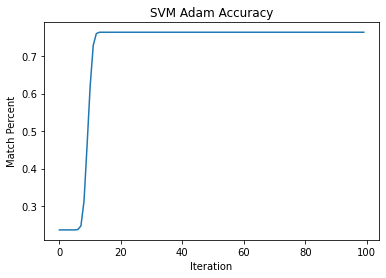

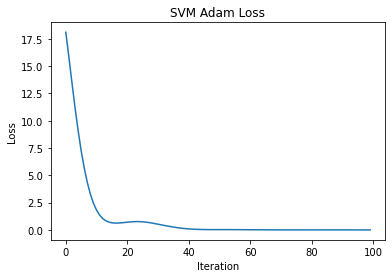

In [17]:
W, loss, acc = SVM_classifier_Adam(X=X_train, Y=Y_train, c=0.001, epoch=100, batch=40, learning_rate=0.01)

plt.figure()
plt.plot(acc)
plt.title("SVM Adam Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Match Percent")
plt.savefig('lab2_svm_adam_acc.pdf')
plt.show()
plt.figure()
plt.plot(loss)
plt.title("SVM Adam Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.savefig('lab2_svm_adam_loss.pdf')
plt.show()